<a href="https://colab.research.google.com/github/Arshapjoy/Movie_Recommendation_System_Project/blob/main/notebooks/MRS_MCA_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Movie Recommendation System**

**Dataset Overview**

***Rotten Tomatoes Movies Dataset: rotten_tomatoes_movies.csv***

- **id**: Unique identifier for each movie
- **title**: The title of the movie
- **audienceScore**: The average score given by regular viewers
- **tomatoMeter**: The percentage of positive reviews from professional critics
- **rating**: The movie's age-based classification (e.g., G, PG, PG-13, R)
- **ratingContents**: Content leading to the rating classification
- **releaseDateTheatres**: The date the movie was released in theaters
- **releaseDateStreaming**: The date the movie became available for streaming
- **runtimeMinutes**: The duration of the movie in minutes
- **genre**: The movie's genre(s)
- **originalLanguage**: The original language of the movie
- **director**: The movie's director
- **writer**: The writer(s) responsible for the movie's screenplay
- **boxOffice**: The movie's total box office revenue
- **distributor**: The company responsible for distributing the movie
- **soundMix**: The audio format(s) used in the movie


***Rotten Tomatoes Movie Reviews Dataset: rotten_tomatoes_movie_reviews.csv***

- **id**: Unique identifier for each movie (matches the id in rotten_tomatoes_movies.csv)
- **reviewId**: Unique identifier for each critic review
- **creationDate**: The date the review was published
- **criticName**: The name of the critic who wrote the review
- **isTopCritic**: A boolean value indicating if the critic is considered a top critic
- **originalScore**: The score provided by the critic
- **reviewState**: The status of the review (e.g., fresh, rotten)
- **publicatioName**: The name of the publication where the review was published
- **reviewText**: The full text of the critic review
- **scoreSentiment**: The sentiment of the critic's score (e.g., positive, negative, neutral)
- **reviewUrl**: The URL of the original review on Rotten Tomatoes

In [ ]:
%cd /content/drive/MyDrive/MCA_project

/content/drive/MyDrive/MCA_project


### importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


### loading the data

In [ ]:
movies=pd.read_csv("/content/drive/MyDrive/MCA_project/rotten_tomatoes_movies.csv")
reviews=pd.read_csv("/content/drive/MyDrive/MCA_project/rotten_tomatoes_movie_reviews.csv")


In [ ]:
movies.head()

,id,title,audienceScore,tomatoMeter,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,writer,boxOffice,distributor,soundMix
0,space-zombie-bingo,Space Zombie Bingo!,50.0,NaN,NaN,NaN,NaN,2018-08-25,75.0,"Comedy, Horror, Sci-fi",English,George Ormrod,"George Ormrod,John Sabotta",NaN,NaN,NaN
1,the_green_grass,The Green Grass,NaN,NaN,NaN,NaN,NaN,2020-02-11,114.0,Drama,English,Tiffany Edwards,Tiffany Edwards,NaN,NaN,NaN
2,love_lies,"Love, Lies",43.0,NaN,NaN,NaN,NaN,NaN,120.0,Drama,Korean,"Park Heung-Sik,Heung-Sik Park","Ha Young-Joon,Jeon Yun-su,Song Hye-jin",NaN,NaN,NaN
3,the_sore_losers_1997,Sore Losers,60.0,NaN,NaN,NaN,NaN,2020-10-23,90.0,"Action, Mystery & thriller",English,John Michael McCarthy,John Michael McCarthy,NaN,NaN,NaN
4,dinosaur_island_2002,Dinosaur Island,70.0,NaN,NaN,NaN,NaN,2017-03-27,80.0,"Fantasy, Adventure, Animation",English,Will Meugniot,John Loy,NaN,NaN,NaN


In [ ]:
movies.shape

(143258, 16)

In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143258 entries, 0 to 143257
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    143258 non-null  object 
 1   title                 142891 non-null  object 
 2   audienceScore         73248 non-null   float64
 3   tomatoMeter           33877 non-null   float64
 4   rating                13991 non-null   object 
 5   ratingContents        13991 non-null   object 
 6   releaseDateTheaters   30773 non-null   object 
 7   releaseDateStreaming  79420 non-null   object 
 8   runtimeMinutes        129431 non-null  float64
 9   genre                 132175 non-null  object 
 10  originalLanguage      129400 non-null  object 
 11  director              139041 non-null  object 
 12  writer                90116 non-null   object 
 13  boxOffice             14743 non-null   object 
 14  distributor           23001 non-null   object 
 15  

In [ ]:
reviews.head()

,id,reviewId,creationDate,criticName,isTopCritic,originalScore,reviewState,publicatioName,reviewText,scoreSentiment,reviewUrl
0,beavers,1145982,2003-05-23,Ivan M. Lincoln,False,3.5/4,fresh,Deseret News (Salt Lake City),Timed to be just long enough for most youngste...,POSITIVE,http://www.deseretnews.com/article/700003233/B...
1,blood_mask,1636744,2007-06-02,The Foywonder,False,1/5,rotten,Dread Central,It doesn't matter if a movie costs 300 million...,NEGATIVE,http://www.dreadcentral.com/index.php?name=Rev...
2,city_hunter_shinjuku_private_eyes,2590987,2019-05-28,Reuben Baron,False,NaN,fresh,CBR,The choreography is so precise and lifelike at...,POSITIVE,https://www.cbr.com/city-hunter-shinjuku-priva...
3,city_hunter_shinjuku_private_eyes,2558908,2019-02-14,Matt Schley,False,2.5/5,rotten,Japan Times,The film's out-of-touch attempts at humor may ...,NEGATIVE,https://www.japantimes.co.jp/culture/2019/02/0...
4,dangerous_men_2015,2504681,2018-08-29,Pat Padua,False,NaN,fresh,DCist,Its clumsy determination is endearing and some...,POSITIVE,http://dcist.com/2015/11/out_of_frame_dangerou...


In [ ]:
reviews.shape

(1444963, 11)

In [ ]:
combined_df = pd.merge(movies, reviews, on='id', how='outer')

In [ ]:
combined_df.head()

,id,title,audienceScore,tomatoMeter,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,...,reviewId,creationDate,criticName,isTopCritic,originalScore,reviewState,publicatioName,reviewText,scoreSentiment,reviewUrl
0,space-zombie-bingo,Space Zombie Bingo!,50.0,NaN,NaN,NaN,NaN,2018-08-25,75.0,"Comedy, Horror, Sci-fi",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,the_green_grass,The Green Grass,NaN,NaN,NaN,NaN,NaN,2020-02-11,114.0,Drama,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,love_lies,"Love, Lies",43.0,NaN,NaN,NaN,NaN,NaN,120.0,Drama,...,2739073.0,2020-10-31,James Mudge,False,4/5,fresh,easternKicks.com,Though let down by its routine love triangle n...,POSITIVE,https://www.easternkicks.com/reviews/love-lies
3,love_lies,"Love, Lies",43.0,NaN,NaN,NaN,NaN,NaN,120.0,Drama,...,2333658.0,2016-06-15,Diva Velez,False,3.5/5,fresh,TheDivaReview.com,"While not perfect, Love, Lies is a worthy disc...",POSITIVE,http://thedivareview.com/Love_Lies_Movie_Revie...
4,the_sore_losers_1997,Sore Losers,60.0,NaN,NaN,NaN,NaN,2020-10-23,90.0,"Action, Mystery & thriller",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
combined_df.shape

(1543226, 26)

In [ ]:
combined_df.describe()

,audienceScore,tomatoMeter,runtimeMinutes,reviewId
count,1.421875e+06,1.398498e+06,1.507064e+06,1.469840e+06
mean,6.500528e+01,6.691996e+01,1.064483e+02,9.072904e+06
std,1.992066e+01,2.608015e+01,2.231633e+01,2.582043e+07
min,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
25%,5.000000e+01,4.800000e+01,9.300000e+01,1.610117e+06
50%,6.800000e+01,7.400000e+01,1.030000e+02,2.200338e+06
75%,8.100000e+01,8.900000e+01,1.170000e+02,2.587786e+06
max,1.000000e+02,1.000000e+02,2.700000e+03,1.027962e+08


In [ ]:
missing_values = combined_df.isnull().sum()
missing_values

id                           0
title                     5949
audienceScore           121351
tomatoMeter             144728
rating                  651080
ratingContents          651080
releaseDateTheaters     353559
releaseDateStreaming    156180
runtimeMinutes           36162
genre                    28586
originalLanguage         36622
director                 12545
writer                  188877
boxOffice               532328
distributor             407044
soundMix                836505
reviewId                 73386
creationDate             73386
criticName               73386
isTopCritic              73386
originalScore           516289
reviewState              73386
publicatioName           73386
reviewText              143671
scoreSentiment           73386
reviewUrl               287903
dtype: int64

In [ ]:
percentage_missing = (missing_values / len(combined_df)) * 100
print("Percentage of missing values:\n", percentage_missing)


Percentage of missing values:
 id                       0.000000
title                    0.385491
audienceScore            7.863463
tomatoMeter              9.378276
rating                  42.189543
ratingContents          42.189543
releaseDateTheaters     22.910384
releaseDateStreaming    10.120358
runtimeMinutes           2.343273
genre                    1.852353
originalLanguage         2.373081
director                 0.812908
writer                  12.239102
boxOffice               34.494494
distributor             26.376176
soundMix                54.204958
reviewId                 4.755363
creationDate             4.755363
criticName               4.755363
isTopCritic              4.755363
originalScore           33.455178
reviewState              4.755363
publicatioName           4.755363
reviewText               9.309784
scoreSentiment           4.755363
reviewUrl               18.655919
dtype: float64


In [ ]:
#the percentage of rows with duplicate values

duplicate_rows = combined_df[combined_df.duplicated()]
percentage_duplicates = (len(duplicate_rows) / len(combined_df)) * 100
print("Percentage of duplicate rows:", percentage_duplicates)

Percentage of duplicate rows: 2.444230462680126


In [ ]:
#dropping duplicates
combined_df.drop_duplicates(inplace=True)

In [ ]:
# Drop rows with missing values in the 'title' column
combined_df.dropna(subset=['title'], inplace=True)


In [ ]:
# Columns to drop
columns_to_drop = ['releaseDateTheaters', 'releaseDateStreaming', 'soundMix',
                   'reviewId', 'creationDate', 'criticName', 'isTopCritic',
                   'reviewState', 'publicatioName', 'reviewUrl']
# Drop columns
combined_df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
# Mean imputation for numerical columns
combined_df['audienceScore'].fillna(combined_df['audienceScore'].mean(), inplace=True)
combined_df['tomatoMeter'].fillna(combined_df['tomatoMeter'].mean(), inplace=True)
combined_df['runtimeMinutes'].fillna(combined_df['runtimeMinutes'].mean(), inplace=True)

In [ ]:
# Define a function to preprocess box office values and convert them to numerical form
def preprocess_box_office(value):
    if isinstance(value, str):
        # Remove non-numeric characters and handle 'K' and 'M' suffixes
        value = value.replace('$', '').replace('K', 'e3').replace('M', 'e6').replace('B', 'e9')
        # Convert the value to numerical form
        value = float(value)
        # Format the value as a normal float without scientific notation
        formatted_value = "{:.0f}".format(value)
        return float(formatted_value)
    else:
        return value

# Apply the function to the 'boxOffice' column
combined_df['boxOffice_numerical'] = combined_df['boxOffice'].apply(preprocess_box_office)





In [ ]:
combined_df['boxOffice_numerical'] = combined_df['boxOffice_numerical'] / 1e6
combined_df['boxOffice_numerical'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: boxOffice_numerical, dtype: float64

In [ ]:
combined_df['originalScore'].unique()

array([nan, '4/5', '3.5/5', ..., '9.98/10', '8.843495459/10', '9.6421/10'],
      dtype=object)

In [ ]:
# Function to normalize original scores to a scale of 10
def normalize_score(score):
    if isinstance(score, str):
        try:
            # Split the score by '/'
            parts = score.split('/')
            if len(parts) == 2:
                # Convert the first part to a float and normalize it to a scale of 10
                denominator = float(parts[1])
                if denominator != 0:  # Check if denominator is not zero
                    return float(parts[0]) / denominator * 10
                else:
                    return float('nan')
            else:
                # If the format is not recognized, return NaN
                return float('nan')
        except ValueError:
            # If the conversion fails, return NaN
            return float('nan')
    else:
        # If the score is not a string, return NaN
        return float('nan')

In [ ]:
# Apply the function to the 'originalScore' column
combined_df['originalScore_normalized'] = combined_df['originalScore'].apply(normalize_score)

In [ ]:
combined_df['rating'].unique()

array([nan, 'PG-13', 'TVPG', 'R', 'PG', 'TV14', 'NC-17', 'TVG', 'TVMA',
       'TVY7', 'G'], dtype=object)

In [ ]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1499702 entries, 0 to 1542928
Data columns (total 18 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   id                        1499702 non-null  object 
 1   title                     1499702 non-null  object 
 2   audienceScore             1499702 non-null  float64
 3   tomatoMeter               1499702 non-null  float64
 4   rating                    869135 non-null   object 
 5   ratingContents            869135 non-null   object 
 6   runtimeMinutes            1499702 non-null  float64
 7   genre                     1477160 non-null  object 
 8   originalLanguage          1469320 non-null  object 
 9   director                  1493028 non-null  object 
 10  writer                    1321065 non-null  object 
 11  boxOffice                 985626 non-null   object 
 12  distributor               1107332 non-null  object 
 13  originalScore             997174

In [ ]:
# Drop the 'originalScore' column
combined_df.drop(columns=['originalScore'], inplace=True)
combined_df.drop(columns=['boxOffice'], inplace=True)

In [ ]:
combined_df['boxOffice_numerical'].fillna(combined_df['boxOffice_numerical'].mean(), inplace=True)
combined_df['originalScore_normalized'].fillna(combined_df['originalScore_normalized'].mean(), inplace=True)

In [ ]:
# Columns for which 'Unknown' category needs to be created
columns_to_unknown = ['rating', 'ratingContents', 'genre', 'originalLanguage',
                      'director', 'writer', 'distributor', 'reviewText', 'scoreSentiment']

# Fill missing values with 'Unknown'
combined_df[columns_to_unknown] = combined_df[columns_to_unknown].fillna('Unknown')



In [ ]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1499702 entries, 0 to 1542928
Data columns (total 16 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   id                        1499702 non-null  object 
 1   title                     1499702 non-null  object 
 2   audienceScore             1499702 non-null  float64
 3   tomatoMeter               1499702 non-null  float64
 4   rating                    1499702 non-null  object 
 5   ratingContents            1499702 non-null  object 
 6   runtimeMinutes            1499702 non-null  float64
 7   genre                     1499702 non-null  object 
 8   originalLanguage          1499702 non-null  object 
 9   director                  1499702 non-null  object 
 10  writer                    1499702 non-null  object 
 11  distributor               1499702 non-null  object 
 12  reviewText                1499702 non-null  object 
 13  scoreSentiment            149970

In [ ]:
combined_df.isnull().sum()

id                          0
title                       0
audienceScore               0
tomatoMeter                 0
rating                      0
ratingContents              0
runtimeMinutes              0
genre                       0
originalLanguage            0
director                    0
writer                      0
distributor                 0
reviewText                  0
scoreSentiment              0
boxOffice_numerical         0
originalScore_normalized    0
dtype: int64

In [ ]:
combined_df.describe()

,audienceScore,tomatoMeter,runtimeMinutes,boxOffice_numerical,originalScore_normalized
count,1.499702e+06,1.499702e+06,1.499702e+06,1.499702e+06,1.499702e+06
mean,6.497196e+01,6.692034e+01,1.063748e+02,4.796943e+01,4.634202e+01
std,1.913096e+01,2.484738e+01,2.180480e+01,7.155819e+01,2.721925e+04
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,-2.500000e+00
25%,5.200000e+01,5.100000e+01,9.300000e+01,4.100000e+00,6.000000e+00
50%,6.600000e+01,7.000000e+01,1.040000e+02,4.796943e+01,8.750000e+00
75%,8.000000e+01,8.800000e+01,1.170000e+02,4.796943e+01,4.634202e+01
max,1.000000e+02,1.000000e+02,2.700000e+03,8.584000e+02,3.333334e+07


In [ ]:
combined_df.head()

,id,title,audienceScore,tomatoMeter,rating,ratingContents,runtimeMinutes,genre,originalLanguage,director,writer,distributor,reviewText,scoreSentiment,boxOffice_numerical,originalScore_normalized
0,space-zombie-bingo,Space Zombie Bingo!,50.000000,66.920339,Unknown,Unknown,75.0,"Comedy, Horror, Sci-fi",English,George Ormrod,"George Ormrod,John Sabotta",Unknown,Unknown,Unknown,47.969428,46.342017
1,the_green_grass,The Green Grass,64.971958,66.920339,Unknown,Unknown,114.0,Drama,English,Tiffany Edwards,Tiffany Edwards,Unknown,Unknown,Unknown,47.969428,46.342017
2,love_lies,"Love, Lies",43.000000,66.920339,Unknown,Unknown,120.0,Drama,Korean,"Park Heung-Sik,Heung-Sik Park","Ha Young-Joon,Jeon Yun-su,Song Hye-jin",Unknown,Though let down by its routine love triangle n...,POSITIVE,47.969428,8.000000
3,love_lies,"Love, Lies",43.000000,66.920339,Unknown,Unknown,120.0,Drama,Korean,"Park Heung-Sik,Heung-Sik Park","Ha Young-Joon,Jeon Yun-su,Song Hye-jin",Unknown,"While not perfect, Love, Lies is a worthy disc...",POSITIVE,47.969428,7.000000
4,the_sore_losers_1997,Sore Losers,60.000000,66.920339,Unknown,Unknown,90.0,"Action, Mystery & thriller",English,John Michael McCarthy,John Michael McCarthy,Unknown,Unknown,Unknown,47.969428,46.342017


In [ ]:
combined_df['scoreSentiment'].unique()

array(['Unknown', 'POSITIVE', 'NEGATIVE'], dtype=object)

In [ ]:
combined_df['genre'][4]

'Action, Mystery & thriller'

In [ ]:
combined_df['reviewText'][4]

'Unknown'

In [ ]:
combined_df.head()

,id,title,audienceScore,tomatoMeter,rating,ratingContents,runtimeMinutes,genre,originalLanguage,director,writer,distributor,reviewText,scoreSentiment,boxOffice_numerical,originalScore_normalized
0,space-zombie-bingo,Space Zombie Bingo!,50.000000,66.920339,Unknown,Unknown,75.0,"Comedy, Horror, Sci-fi",English,George Ormrod,"George Ormrod,John Sabotta",Unknown,Unknown,Unknown,47.969428,46.342017
1,the_green_grass,The Green Grass,64.971958,66.920339,Unknown,Unknown,114.0,Drama,English,Tiffany Edwards,Tiffany Edwards,Unknown,Unknown,Unknown,47.969428,46.342017
2,love_lies,"Love, Lies",43.000000,66.920339,Unknown,Unknown,120.0,Drama,Korean,"Park Heung-Sik,Heung-Sik Park","Ha Young-Joon,Jeon Yun-su,Song Hye-jin",Unknown,Though let down by its routine love triangle n...,POSITIVE,47.969428,8.000000
3,love_lies,"Love, Lies",43.000000,66.920339,Unknown,Unknown,120.0,Drama,Korean,"Park Heung-Sik,Heung-Sik Park","Ha Young-Joon,Jeon Yun-su,Song Hye-jin",Unknown,"While not perfect, Love, Lies is a worthy disc...",POSITIVE,47.969428,7.000000
4,the_sore_losers_1997,Sore Losers,60.000000,66.920339,Unknown,Unknown,90.0,"Action, Mystery & thriller",English,John Michael McCarthy,John Michael McCarthy,Unknown,Unknown,Unknown,47.969428,46.342017


In [ ]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1499702 entries, 0 to 1542928
Data columns (total 16 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   id                        1499702 non-null  object 
 1   title                     1499702 non-null  object 
 2   audienceScore             1499702 non-null  float64
 3   tomatoMeter               1499702 non-null  float64
 4   rating                    1499702 non-null  object 
 5   ratingContents            1499702 non-null  object 
 6   runtimeMinutes            1499702 non-null  float64
 7   genre                     1499702 non-null  object 
 8   originalLanguage          1499702 non-null  object 
 9   director                  1499702 non-null  object 
 10  writer                    1499702 non-null  object 
 11  distributor               1499702 non-null  object 
 12  reviewText                1499702 non-null  object 
 13  scoreSentiment            149970

In [ ]:
combined_df.shape

(1499702, 16)

In [ ]:
#save combined_df into csv

combined_df.to_csv('clean.csv', index=False)


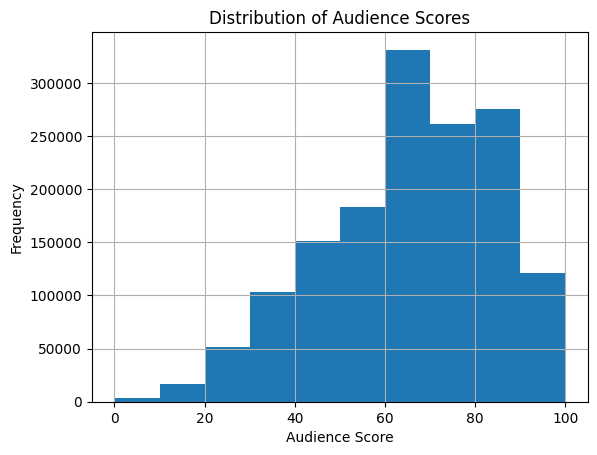

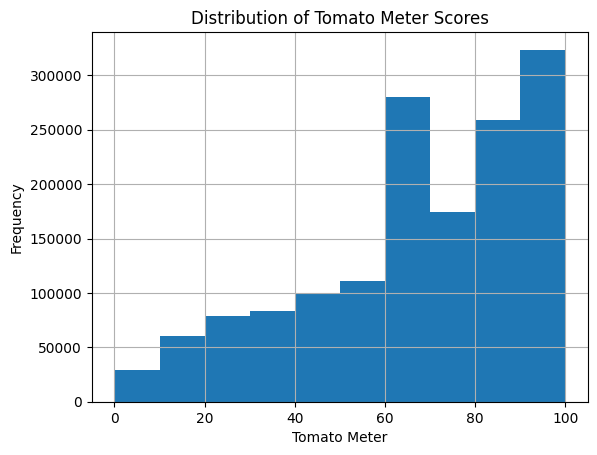

In [ ]:
combined_df['audienceScore'].hist(bins=10)
plt.xlabel('Audience Score')
plt.ylabel('Frequency')
plt.title('Distribution of Audience Scores')
plt.show()

combined_df['tomatoMeter'].hist(bins=10)
plt.xlabel('Tomato Meter')
plt.ylabel('Frequency')
plt.title('Distribution of Tomato Meter Scores')
plt.show()


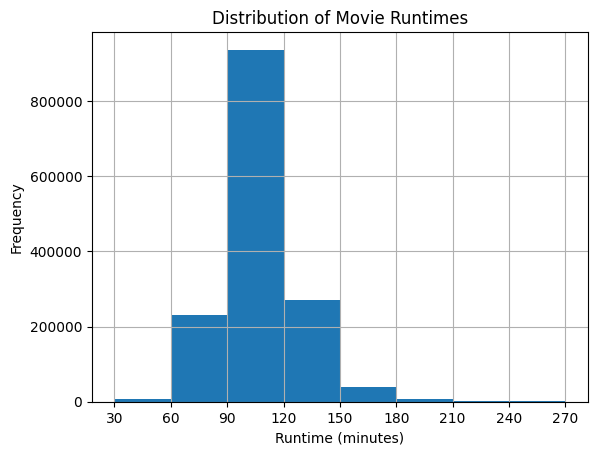

In [ ]:
combined_df['runtimeMinutes'].hist(bins=[30*i for i in range(1,10)])
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Runtimes')
plt.xticks([30*i for i in range(1,10)], [str(30*i) for i in range(1,10)])
plt.show()



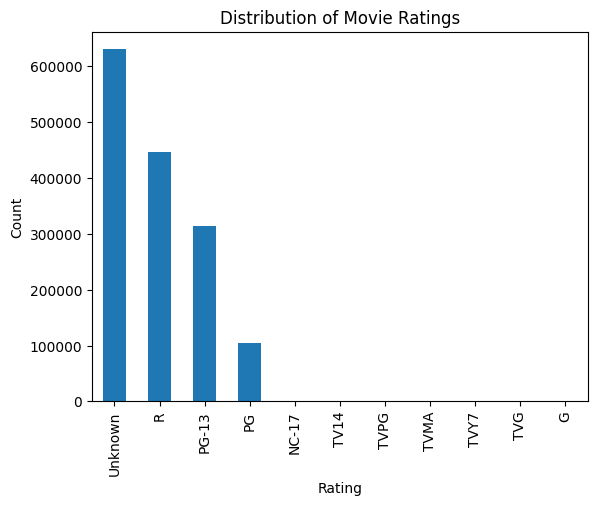

In [ ]:
combined_df['rating'].value_counts().plot(kind='bar')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Movie Ratings')
plt.show()


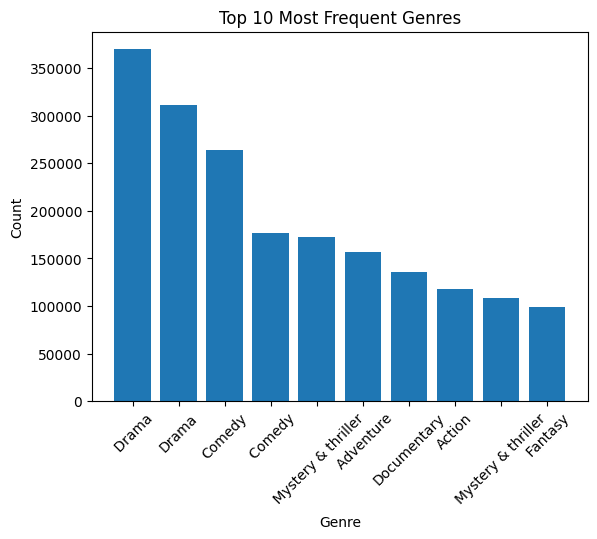

In [ ]:
top_genres = combined_df['genre'].str.split(',').explode().value_counts().head(10)
plt.bar(top_genres.index, top_genres.values)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Top 10 Most Frequent Genres')
plt.xticks(rotation=45)
plt.show()


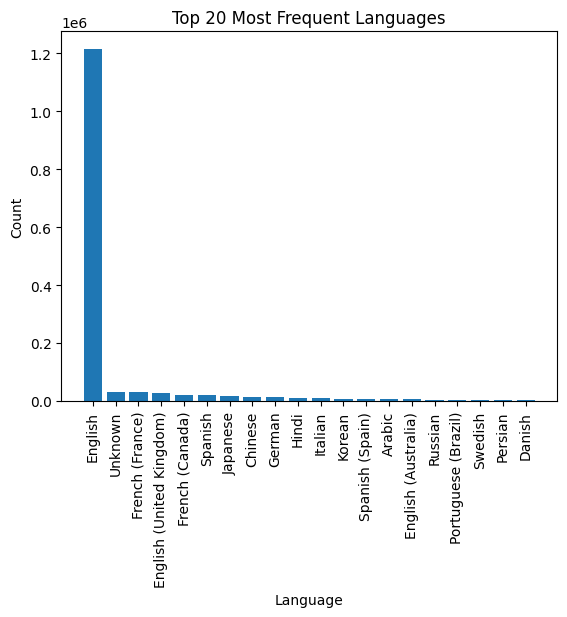

In [ ]:
# prompt: top 20 languages

import matplotlib.pyplot as plt
top_languages = combined_df['originalLanguage'].value_counts().head(20)
plt.bar(top_languages.index, top_languages.values)
plt.xlabel('Language')
plt.ylabel('Count')
plt.title('Top 20 Most Frequent Languages')
plt.xticks(rotation=90)
plt.show()


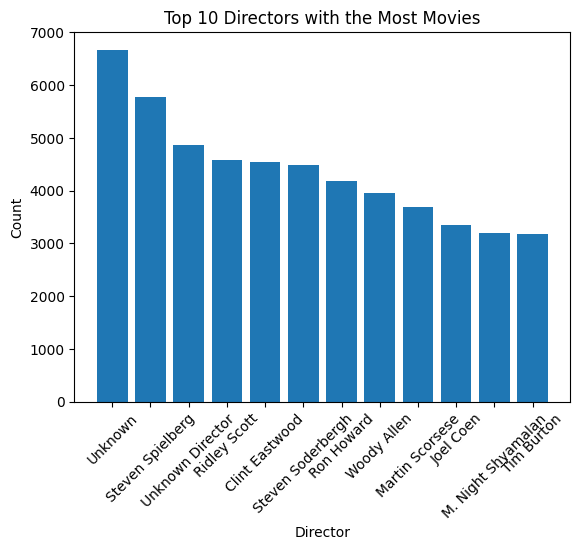

In [ ]:
top_directors = combined_df['director'].str.split(',').explode().value_counts().head(12)
plt.bar(top_directors.index, top_directors.values)
plt.xlabel('Director')
plt.ylabel('Count')
plt.title('Top 10 Directors with the Most Movies')
plt.xticks(rotation=45)
plt.show()


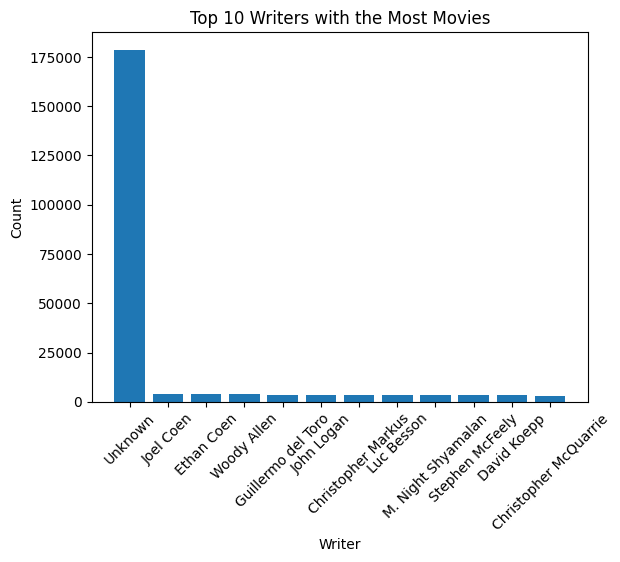

In [ ]:
top_writers = combined_df['writer'].str.split(',').explode().value_counts().head(12)
plt.bar(top_writers.index, top_writers.values)
plt.xlabel('Writer')
plt.ylabel('Count')
plt.title('Top 10 Writers with the Most Movies')
plt.xticks(rotation=45)
plt.show()


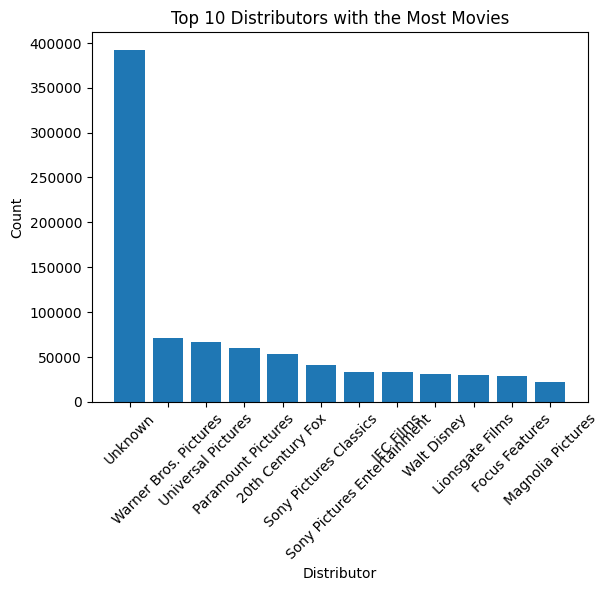

In [ ]:
top_distributors = combined_df['distributor'].value_counts().head(12)
plt.bar(top_distributors.index, top_distributors.values)
plt.xlabel('Distributor')
plt.ylabel('Count')
plt.title('Top 10 Distributors with the Most Movies')
plt.xticks(rotation=45)
plt.show()


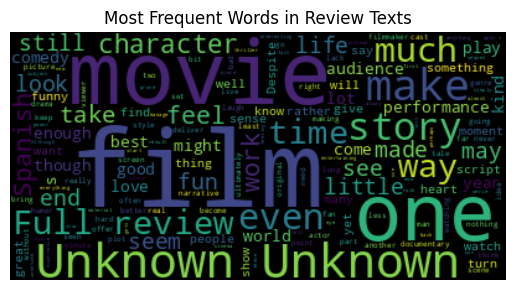

In [ ]:
from wordcloud import WordCloud

text = ' '.join(combined_df['reviewText'])
wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Review Texts')
plt.show()


film, movie,one,made,story,character,look,make,take,way,made,fun

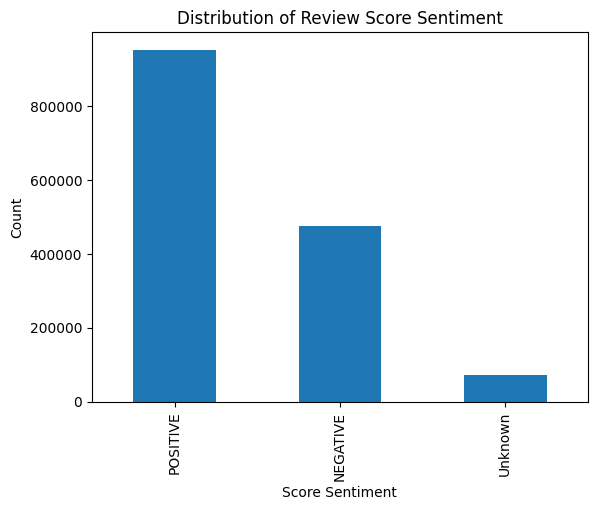

In [ ]:
combined_df['scoreSentiment'].value_counts().plot(kind='bar')
plt.xlabel('Score Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Review Score Sentiment')
plt.show()


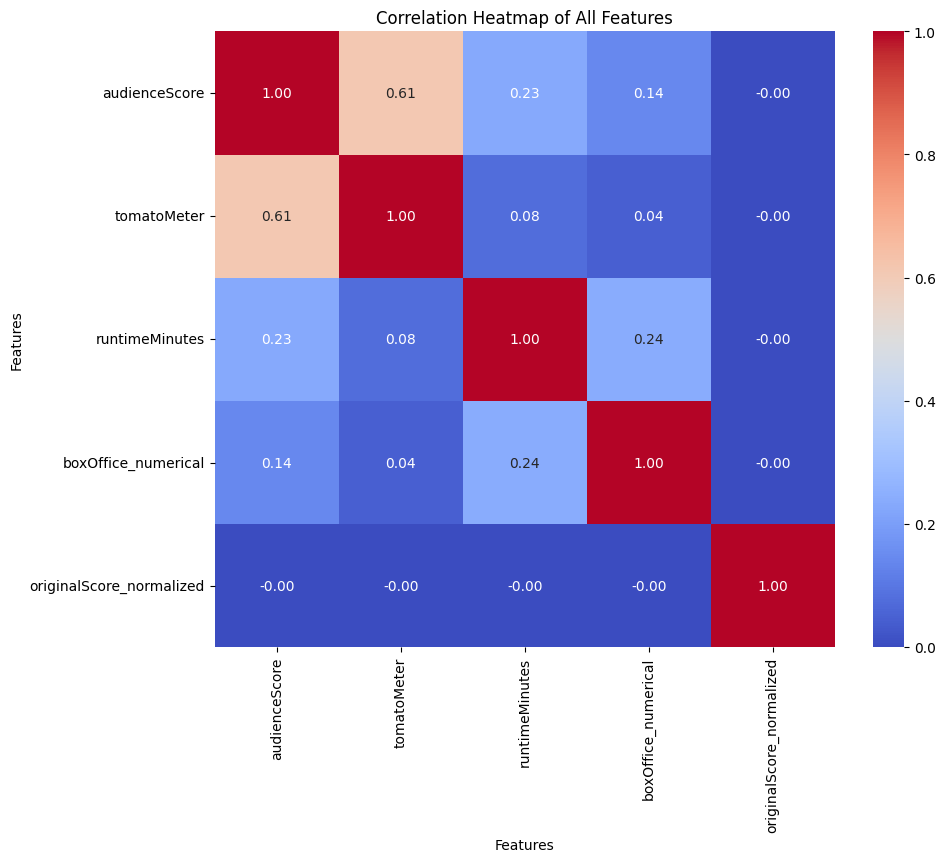

In [ ]:
# Select only numeric columns
numeric_columns = combined_df.select_dtypes(include=['float64', 'int64'])

# Get the correlation matrix
correlation_matrix = numeric_columns.corr()

# Create the heatmap
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', ax=ax)

# Add title and labels
plt.title('Correlation Heatmap of All Features')
plt.xlabel('Features')
plt.ylabel('Features')

# Show the heatmap
plt.show()


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder, StandardScaler



# Define text, categorical, and numerical columns
text_columns = ['ratingContents', 'genre', 'director', 'writer', 'distributor', 'reviewText']
categorical_columns = ['rating', 'scoreSentiment']
numerical_columns = ['audienceScore', 'tomatoMeter', 'runtimeMinutes', 'boxOffice_numerical', 'originalScore_normalized']

# Initialize TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'title' column
combined_df['title_encoded'] = label_encoder.fit_transform(combined_df['title'].astype(str))

# Batch processing for text columns
batch_size = 10000  # Adjust batch size based on memory constraints and performance

for batch_start in range(0, len(combined_df), batch_size):
    batch_end = min(batch_start + batch_size, len(combined_df))
    batch = combined_df.iloc[batch_start:batch_end].copy()  # Copy the batch for processing

    # Preprocess text columns
    for column in text_columns:
        processed_texts = vectorizer.fit_transform(batch[column].fillna('').astype(str))  # Fill NaN values with empty string and convert to string
        if processed_texts.shape[1] > 0:  # Check if vocabulary is not empty
            batch[column] = processed_texts.toarray()  # Convert sparse matrix to dense array and update the column

    # Update original dataframe with processed batch
    combined_df.iloc[batch_start:batch_end] = batch

# Batch processing for categorical columns
label_encoders = {}

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    combined_df[column] = label_encoders[column].fit_transform(combined_df[column])

# Standardize numerical columns
scaler = StandardScaler()
combined_df[numerical_columns] = scaler.fit_transform(combined_df[numerical_columns])

# Perform additional feature engineering or processing as needed


In [ ]:
#save combined_df into csv

#combined_df.to_csv('clean_data.csv', index=False)
